# This Notebook tries to find the trends in decresing Air Quality over time in Delhi.

### The data being used here has been downlaoded from data.gov.in, a website where Government of India provides multiple datasets to general public for their R&D

## This Notebook will work on the below:

###  1. Importing all the related Python Packages and loading data from the downloaded XML files.
###  2. Data CLeaning
###  3. Performing Exploratory Data Analysis (EDA)

In [1]:
#Importing related packages
import os
import pandas as pd
import pandas_read_xml as pdx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from patsy import dmatrices
%matplotlib inline

In [2]:
#Print the current directory
path = os.getcwd()
print(path)

d:\Learning\Springboard\GitHub\Data_Science_Projects\Delhi AQI


In [3]:
#Print the Directory Contents
os.listdir()

['data', 'Delhi Air Quality.ipynb']

### All the data files are present inside the data folder. Hence, we need to read those files before proceeding

In [4]:
#Print the contents of 'data' Directory
os.listdir(os.path.join(path, 'data'))

['datafile (1).xls',
 'datafile (10).xls',
 'datafile (11).xls',
 'datafile (12).xls',
 'datafile (13).xls',
 'datafile (14).xls',
 'datafile (15).xls',
 'datafile (16).xls',
 'datafile (17).xls',
 'datafile (18).xls',
 'datafile (19).xls',
 'datafile (2).xls',
 'datafile (20).xls',
 'datafile (21).xls',
 'datafile (22).xls',
 'datafile (23).xls',
 'datafile (24).xls',
 'datafile (25).xls',
 'datafile (26).xls',
 'datafile (3).xls',
 'datafile (4).xls',
 'datafile (5).xls',
 'datafile (6).xls',
 'datafile (7).xls',
 'datafile (8).xls',
 'datafile (9).xls',
 'datafile.xls']

### All the data files are in xls.


In [5]:
aqi = pd.DataFrame()
for fil in os.listdir(os.path.join(path, 'data')):
    df = pd.read_excel(os.path.join(path, 'data', fil))
    aqi = aqi.append(df, ignore_index = True)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but 

In [6]:
#Checking the first 5 rows of the data
aqi.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Agency,Type of Location,SO2,NO2,RSPM/PM10,SPM,Location of Monitoring Station,PM 2.5
0,145.0,January - M011996,Delhi,Delhi,NaN,Industrial Area,22.9,34.2,NaN,366.0,NaN,NaN
1,146.0,January - M011996,Delhi,Delhi,NaN,"Residential, Rural and other Areas",57.9,118.9,NaN,243.0,NaN,NaN
2,144.0,January - M011996,Delhi,Delhi,NaN,"Residential, Rural and other Areas",19.1,77.9,NaN,154.0,NaN,NaN
3,60.0,January - M011996,Delhi,Delhi,Central Pollution Control Board,"Residential, Rural and other Areas",14.9,31.4,NaN,397.0,NaN,NaN
4,59.0,January - M011996,Delhi,Delhi,Central Pollution Control Board,"Residential, Rural and other Areas",18.9,36.7,NaN,358.0,NaN,NaN


In [7]:
#Printing the shape of the Dataframe
aqi.shape

(8568, 12)

In [8]:
#Printing the Basic properties of the Dataframe
aqi.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Stn Code,5263,NaN,NaN,NaN,130.097,118.857,55,57,60,146,531
Sampling Date,8568,3075,January_1995,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,8568,1,Delhi,8568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City/Town/Village/Area,8568,1,Delhi,8568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agency,4607,2,Central Pollution Control Board,3203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type of Location,8568,6,"Residential, Rural and other Areas",3071,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SO2,7827,NaN,NaN,NaN,8.7568,7.62773,0.5,4,6,11.65,127.4
NO2,8024,NaN,NaN,NaN,53.4659,27.4844,2.8,35,47,62.3,224
RSPM/PM10,6667,NaN,NaN,NaN,196.64,115.925,13,111,171,256,892
SPM,5476,NaN,NaN,NaN,399.335,188.534,30,266,366,501,1885


### Priting the count of unique values in each column

In [9]:
aqi.nunique()

Stn Code                            11
Sampling Date                     3075
State                                1
City/Town/Village/Area               1
Agency                               2
Type of Location                     6
SO2                                364
NO2                                955
RSPM/PM10                          774
SPM                                868
Location of Monitoring Station      22
PM 2.5                             148
dtype: int64

### From above, we can infer that:
1.  City/Town/Village/Area have a single value
2.  State have a single value

Thus, these two columns can be dropped from the dataframe.

In [10]:
#Dropping the above statedd two columns
aqi.drop(columns = ['State', 'City/Town/Village/Area'], inplace = True)
aqi.head()

,Stn Code,Sampling Date,Agency,Type of Location,SO2,NO2,RSPM/PM10,SPM,Location of Monitoring Station,PM 2.5
0,145.0,January - M011996,NaN,Industrial Area,22.9,34.2,NaN,366.0,NaN,NaN
1,146.0,January - M011996,NaN,"Residential, Rural and other Areas",57.9,118.9,NaN,243.0,NaN,NaN
2,144.0,January - M011996,NaN,"Residential, Rural and other Areas",19.1,77.9,NaN,154.0,NaN,NaN
3,60.0,January - M011996,Central Pollution Control Board,"Residential, Rural and other Areas",14.9,31.4,NaN,397.0,NaN,NaN
4,59.0,January - M011996,Central Pollution Control Board,"Residential, Rural and other Areas",18.9,36.7,NaN,358.0,NaN,NaN


### Printing the datatypes and count of Null values are there in each column

In [11]:
# Printing the data types of each column
print(aqi.dtypes)

Stn Code                          float64
Sampling Date                      object
Agency                             object
Type of Location                   object
SO2                               float64
NO2                               float64
RSPM/PM10                         float64
SPM                               float64
Location of Monitoring Station     object
PM 2.5                            float64
dtype: object


In [12]:
# Printing count of null values in the dataframe
print(aqi.isna().sum())

Stn Code                          3305
Sampling Date                        0
Agency                            3961
Type of Location                     0
SO2                                741
NO2                                544
RSPM/PM10                         1901
SPM                               3092
Location of Monitoring Station    2039
PM 2.5                            8197
dtype: int64


### Dropping column PM 2.5 since this column has more than 90% data missing.

In [13]:
#Dropping the above stated column
aqi.drop(columns = ['PM 2.5'], inplace = True)
aqi.head()

,Stn Code,Sampling Date,Agency,Type of Location,SO2,NO2,RSPM/PM10,SPM,Location of Monitoring Station
0,145.0,January - M011996,NaN,Industrial Area,22.9,34.2,NaN,366.0,NaN
1,146.0,January - M011996,NaN,"Residential, Rural and other Areas",57.9,118.9,NaN,243.0,NaN
2,144.0,January - M011996,NaN,"Residential, Rural and other Areas",19.1,77.9,NaN,154.0,NaN
3,60.0,January - M011996,Central Pollution Control Board,"Residential, Rural and other Areas",14.9,31.4,NaN,397.0,NaN
4,59.0,January - M011996,Central Pollution Control Board,"Residential, Rural and other Areas",18.9,36.7,NaN,358.0,NaN


### Checking the unique values of Agency Column to identify if this column can be dropped.

In [14]:
aqi.Agency.unique()

array([nan, 'Central Pollution Control Board',
       'National Environmental Engineering Research Institute'],
      dtype=object)

### Since this column only contains the Agency name which collected data, hence it can also be dropped.

In [15]:
#Dropping the above stated column
aqi.drop(columns = ['Agency'], inplace = True)
aqi.head()

,Stn Code,Sampling Date,Type of Location,SO2,NO2,RSPM/PM10,SPM,Location of Monitoring Station
0,145.0,January - M011996,Industrial Area,22.9,34.2,NaN,366.0,NaN
1,146.0,January - M011996,"Residential, Rural and other Areas",57.9,118.9,NaN,243.0,NaN
2,144.0,January - M011996,"Residential, Rural and other Areas",19.1,77.9,NaN,154.0,NaN
3,60.0,January - M011996,"Residential, Rural and other Areas",14.9,31.4,NaN,397.0,NaN
4,59.0,January - M011996,"Residential, Rural and other Areas",18.9,36.7,NaN,358.0,NaN


In [16]:
# Printing count of null values in the dataframe
print(aqi.isna().sum())

Stn Code                          3305
Sampling Date                        0
Type of Location                     0
SO2                                741
NO2                                544
RSPM/PM10                         1901
SPM                               3092
Location of Monitoring Station    2039
dtype: int64


In [17]:
#Printing the unique Sampling Dates
np.set_printoptions(threshold=sys.maxsize)
aqi['Sampling Date'].unique()

9', '13/11/2009', '23/11/2009', '1/7/2009', '1/8/2009',
       '18/2/2009', '19/3/2009', '24/3/2009', '14/4/2009', '15/4/2009',
       '25/4/2009', '5/12/2009', '19/6/2009', '25/7/2009', '26/7/2009',
       '29/7/2009', '18/8/2009', '26/8/2009', '20/10/2009', '11/4/2009',
       '11/12/2009', '12/8/2009', '12/9/2009', '12/10/2009', '1/2/2009',
       '16/1/2009', '2/2/2009', '13/2/2009', '26/2/2009', '3/4/2009',
       '3/9/2009', '16/3/2009', '20/4/2009', '23/4/2009', '28/4/2009',
       '5/4/2009', '15/5/2009', '25/5/2009', '28/5/2009', '6/3/2009',
       '6/8/2009', '6/11/2009', '29/6/2009', '7/3/2009', '13/7/2009',
       '24/7/2009', '8/7/2009', '21/8/2009', '9/7/2009', '18/9/2009',
       '10/1/2009', '10/7/2009', '10/12/2009', '23/10/2009', '28/10/2009',
       '11/9/2009', '20/11/2009', '13/6/2009', '9/10/2009', '23/12/2009',
       '24/12/2009', '25/12/2009', '26/12/2009', '27/12/2009', '1/4/2011',
       '1/7/2011', '1/12/2011', '17/01/2011', '20/01/2011', '25/01/2011',
     

### Above we can see that most of the entries here are dates except a few which have a format of "Month - <M>MMYYYY". These values need to be re-formatted so that they represent a month and year.

In [18]:
#Creating 2 dataframes, one with the above mentioned Date format and the other with all other types of date formats
aqi_new = aqi[aqi['Sampling Date'].str.contains(' - M', case = False)]
aqi = aqi[~aqi['Sampling Date'].str.contains(' - M', case = False)]
print(aqi_new['Sampling Date'].unique())

['January - M011996' 'February - M021996' 'March - M031996'
 'April - M041996' 'May - M051996' 'June - M061996' 'July - M071996'
 'August - M081996' 'September - M091996' 'October - M101996'
 'November - M111996' 'December - M121996' 'January - M011991'
 'February - M021991' 'March - M031991' 'April - M041991' 'May - M051991'
 'June - M061991' 'July - M071991' 'August - M081991'
 'September - M091991' 'October - M101991' 'November - M111991'
 'December - M121991' 'January - M011994' 'February - M021994'
 'March - M031994' 'April - M041994' 'May - M051994' 'June - M061994'
 'July - M071994' 'August - M081994' 'September - M091994'
 'November - M111994' 'December - M121994' 'January - M011997'
 'February - M021997' 'March - M031997' 'April - M041997' 'May - M051997'
 'June - M061997' 'July - M071997' 'August - M081997'
 'September - M091997' 'October - M101997' 'November - M111997'
 'December - M121997' 'January - M011999' 'February - M021999'
 'March - M031999' 'April - M041999' 'May - 

In [19]:
#Converting dates in this new dataframe to format 01-MM-YYYY
aqi_new['Sampling Date'] = aqi_new['Sampling Date'].str[-6:]
aqi_new['Sampling Date'] = [ '01-' + t[:2] + '-' + t[2:] for t in aqi_new['Sampling Date']]
aqi_new['Sampling Date']

0       01-01-1996
1       01-01-1996
2       01-01-1996
3       01-01-1996
4       01-01-1996
           ...    
6092    01-08-2001
6093    01-09-2001
6094    01-10-2001
6095    01-11-2001
6096    01-12-2001
Name: Sampling Date, Length: 1172, dtype: object

### Now we merge the two dataframes back into one

In [20]:
aqi.append(aqi_new, ignore_index = True)

,Stn Code,Sampling Date,Type of Location,SO2,NO2,RSPM/PM10,SPM,Location of Monitoring Station
0,144.0,1/3/2013,"Residential, Rural and other Areas",2.0,59.0,243.0,NaN,"N.Y. SCHOOL, Sarojini Nagar, Delhi"
1,144.0,1/4/2013,"Residential, Rural and other Areas",5.0,77.0,264.0,NaN,"N.Y. SCHOOL, Sarojini Nagar, Delhi"
2,144.0,1/5/2013,"Residential, Rural and other Areas",4.0,68.0,280.0,NaN,"N.Y. SCHOOL, Sarojini Nagar, Delhi"
3,144.0,15-01-13,"Residential, Rural and other Areas",3.0,90.0,335.0,NaN,"N.Y. SCHOOL, Sarojini Nagar, Delhi"
4,144.0,16-01-13,"Residential, Rural and other Areas",3.0,90.0,362.0,NaN,"N.Y. SCHOOL, Sarojini Nagar, Delhi"
...,...,...,...,...,...,...,...,...
8563,146.0,01-08-2001,"Residential, Rural and other Areas",6.2,32.9,NaN,307.0,NaN
8564,146.0,01-09-2001,"Residential, Rural and other Areas",6.7,63.0,NaN,522.0,NaN
8565,146.0,01-10-2001,"Residential, Rural and other Areas",9.3,70.3,NaN,652.0,NaN
8566,146.0,01-11-2001,"Residential, Rural and other Areas",17.0,82.2,NaN,790.0,NaN


### Again check if any dates contain a letter

In [21]:
df = [ dt for dt in aqi['Sampling Date'] if re.match(r"[A-Za-z]", dt)]
np.unique(df)

array(['Annual_1995', 'April_1995', 'August_1995', 'December_1995',
       'February_1995', 'January_1995', 'July_1995', 'June_1995',
       'March_1995', 'May_1995', 'November_1995', 'October_1995',
       'September_1995'], dtype='<U14')

### AS it can be seen that there are a few other date formats as well. we need to handle them as well

In [22]:
#Dropping the rows having values 'Annual_1995' since we need Monthly data
aqi.drop(aqi[aqi['Sampling Date'] == 'Annual_1995'].index, inplace = True)

In [23]:
#Converting all other dates to a known format 01-MM-YYYY
#Create a Dictionary for the Month Names
month = {'January_1995':'01-01-1995','February_1995':'01-02-1995','March_1995':'01-03-1995','April_1995':'01-04-1995','May_1995':'01-05-1995','June_1995':'01-06-1995','July_1995':'01-07-1995','August_1995':'01-08-1995','September_1995':'01-09-1995','October_1995':'01-10-1995','November_1995':'01-11-1995','December_1995':'01-12-1995'}
aqi.replace({'Sampling Date':month}, inplace = True)
df = [ dt for dt in aqi['Sampling Date'] if re.match(r"[A-Za-z]", dt)]
np.unique(df)

array([], dtype=float64)

### Since at this point we are only interested in overall pollution levels in delhi on Monthly basis so we can drop the following columns as well
1.  Stn Code
2.  Type of Location
3.  Location of Monitoring Station

In [24]:
#Dropping the above stated columns
aqi.drop(columns = ['Stn Code', 'Type of Location', 'Location of Monitoring Station'], inplace = True)
aqi.head()

,Sampling Date,SO2,NO2,RSPM/PM10,SPM
105,1/3/2013,2.0,59.0,243.0,NaN
106,1/4/2013,5.0,77.0,264.0,NaN
107,1/5/2013,4.0,68.0,280.0,NaN
108,15-01-13,3.0,90.0,335.0,NaN
109,16-01-13,3.0,90.0,362.0,NaN


In [25]:
#Convert the Sampling Date to datetime type
aqi['Sampling Date'] = pd.to_datetime(aqi['Sampling Date'])
aqi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7387 entries, 105 to 8567
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sampling Date  7387 non-null   datetime64[ns]
 1   SO2            6649 non-null   float64       
 2   NO2            6846 non-null   float64       
 3   RSPM/PM10      6667 non-null   float64       
 4   SPM            4398 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 346.3 KB


### Convert the Sampling Date to Index of the Dataframe

In [26]:
aqi.set_index('Sampling Date', inplace = True)
aqi.head(5)

,SO2,NO2,RSPM/PM10,SPM
Sampling Date,,,,
2013-01-03,2.0,59.0,243.0,NaN
2013-01-04,5.0,77.0,264.0,NaN
2013-01-05,4.0,68.0,280.0,NaN
2013-01-15,3.0,90.0,335.0,NaN
2013-01-16,3.0,90.0,362.0,NaN


### Since there is some missing data in this dataset, so we need to take care of that data

In [27]:
# Missing Data Count
aqi.isna().sum()

SO2           738
NO2           541
RSPM/PM10     720
SPM          2989
dtype: int64

In [28]:
# Fill the missing data using mean method
aqi.fillna(aqi.mean(), inplace = True)
aqi.isna().sum()

SO2          0
NO2          0
RSPM/PM10    0
SPM          0
dtype: int64

### Now, since all the missing data has been taken care of, Resampling the data on a monthly basis

In [29]:
aqi_final = aqi.resample('M').mean()
aqi_final.head(10)

,SO2,NO2,RSPM/PM10,SPM
Sampling Date,,,,
1987-09-30,10.050000,11.450000,196.639771,450.500000
1987-10-31,19.902637,16.450000,196.639771,443.666667
1987-11-30,13.333333,19.183333,196.639771,633.333333
1987-12-31,19.233333,27.716667,196.639771,668.000000
1988-01-31,NaN,NaN,NaN,NaN
1988-02-29,NaN,NaN,NaN,NaN
1988-03-31,NaN,NaN,NaN,NaN
1988-04-30,NaN,NaN,NaN,NaN
1988-05-31,NaN,NaN,NaN,NaN


### From the above resampled data, it looks like there are some years/months for which no data is available. Hence we can remove those entries

In [30]:
aqi_final = aqi_final.dropna()
aqi_final.head(10)

,SO2,NO2,RSPM/PM10,SPM
Sampling Date,,,,
1987-09-30,10.050000,11.450000,196.639771,450.500000
1987-10-31,19.902637,16.450000,196.639771,443.666667
1987-11-30,13.333333,19.183333,196.639771,633.333333
1987-12-31,19.233333,27.716667,196.639771,668.000000
1988-07-31,7.315822,56.521925,196.639771,114.000000
1988-08-31,7.315822,56.521925,196.639771,143.600000
1988-09-30,11.583333,22.500000,196.639771,404.921101
1988-10-31,12.480000,20.520000,196.639771,404.921101
1988-12-31,7.315822,56.521925,196.639771,416.666667


### Now, plotting all the four columns in a line plot

In [31]:
# Grouping the data based on Years so that different plots can be created for different years
year = [g for n, g in aqi_final.groupby(pd.Grouper(level = 'Sampling Date', freq='Y'))]
year[:5]

[                     SO2        NO2   RSPM/PM10         SPM
 Sampling Date                                              
 1987-09-30     10.050000  11.450000  196.639771  450.500000
 1987-10-31     19.902637  16.450000  196.639771  443.666667
 1987-11-30     13.333333  19.183333  196.639771  633.333333
 1987-12-31     19.233333  27.716667  196.639771  668.000000,
                      SO2        NO2   RSPM/PM10         SPM
 Sampling Date                                              
 1988-07-31      7.315822  56.521925  196.639771  114.000000
 1988-08-31      7.315822  56.521925  196.639771  143.600000
 1988-09-30     11.583333  22.500000  196.639771  404.921101
 1988-10-31     12.480000  20.520000  196.639771  404.921101
 1988-12-31      7.315822  56.521925  196.639771  416.666667,
 Empty DataFrame
 Columns: [SO2, NO2, RSPM/PM10, SPM]
 Index: [],
 Empty DataFrame
 Columns: [SO2, NO2, RSPM/PM10, SPM]
 Index: [],
 Empty DataFrame
 Columns: [SO2, NO2, RSPM/PM10, SPM]
 Index: []]

In [32]:
#Remove Empty Dataframes from the list
year = [y for y in year if not y.empty]

In [33]:
len(year)

15

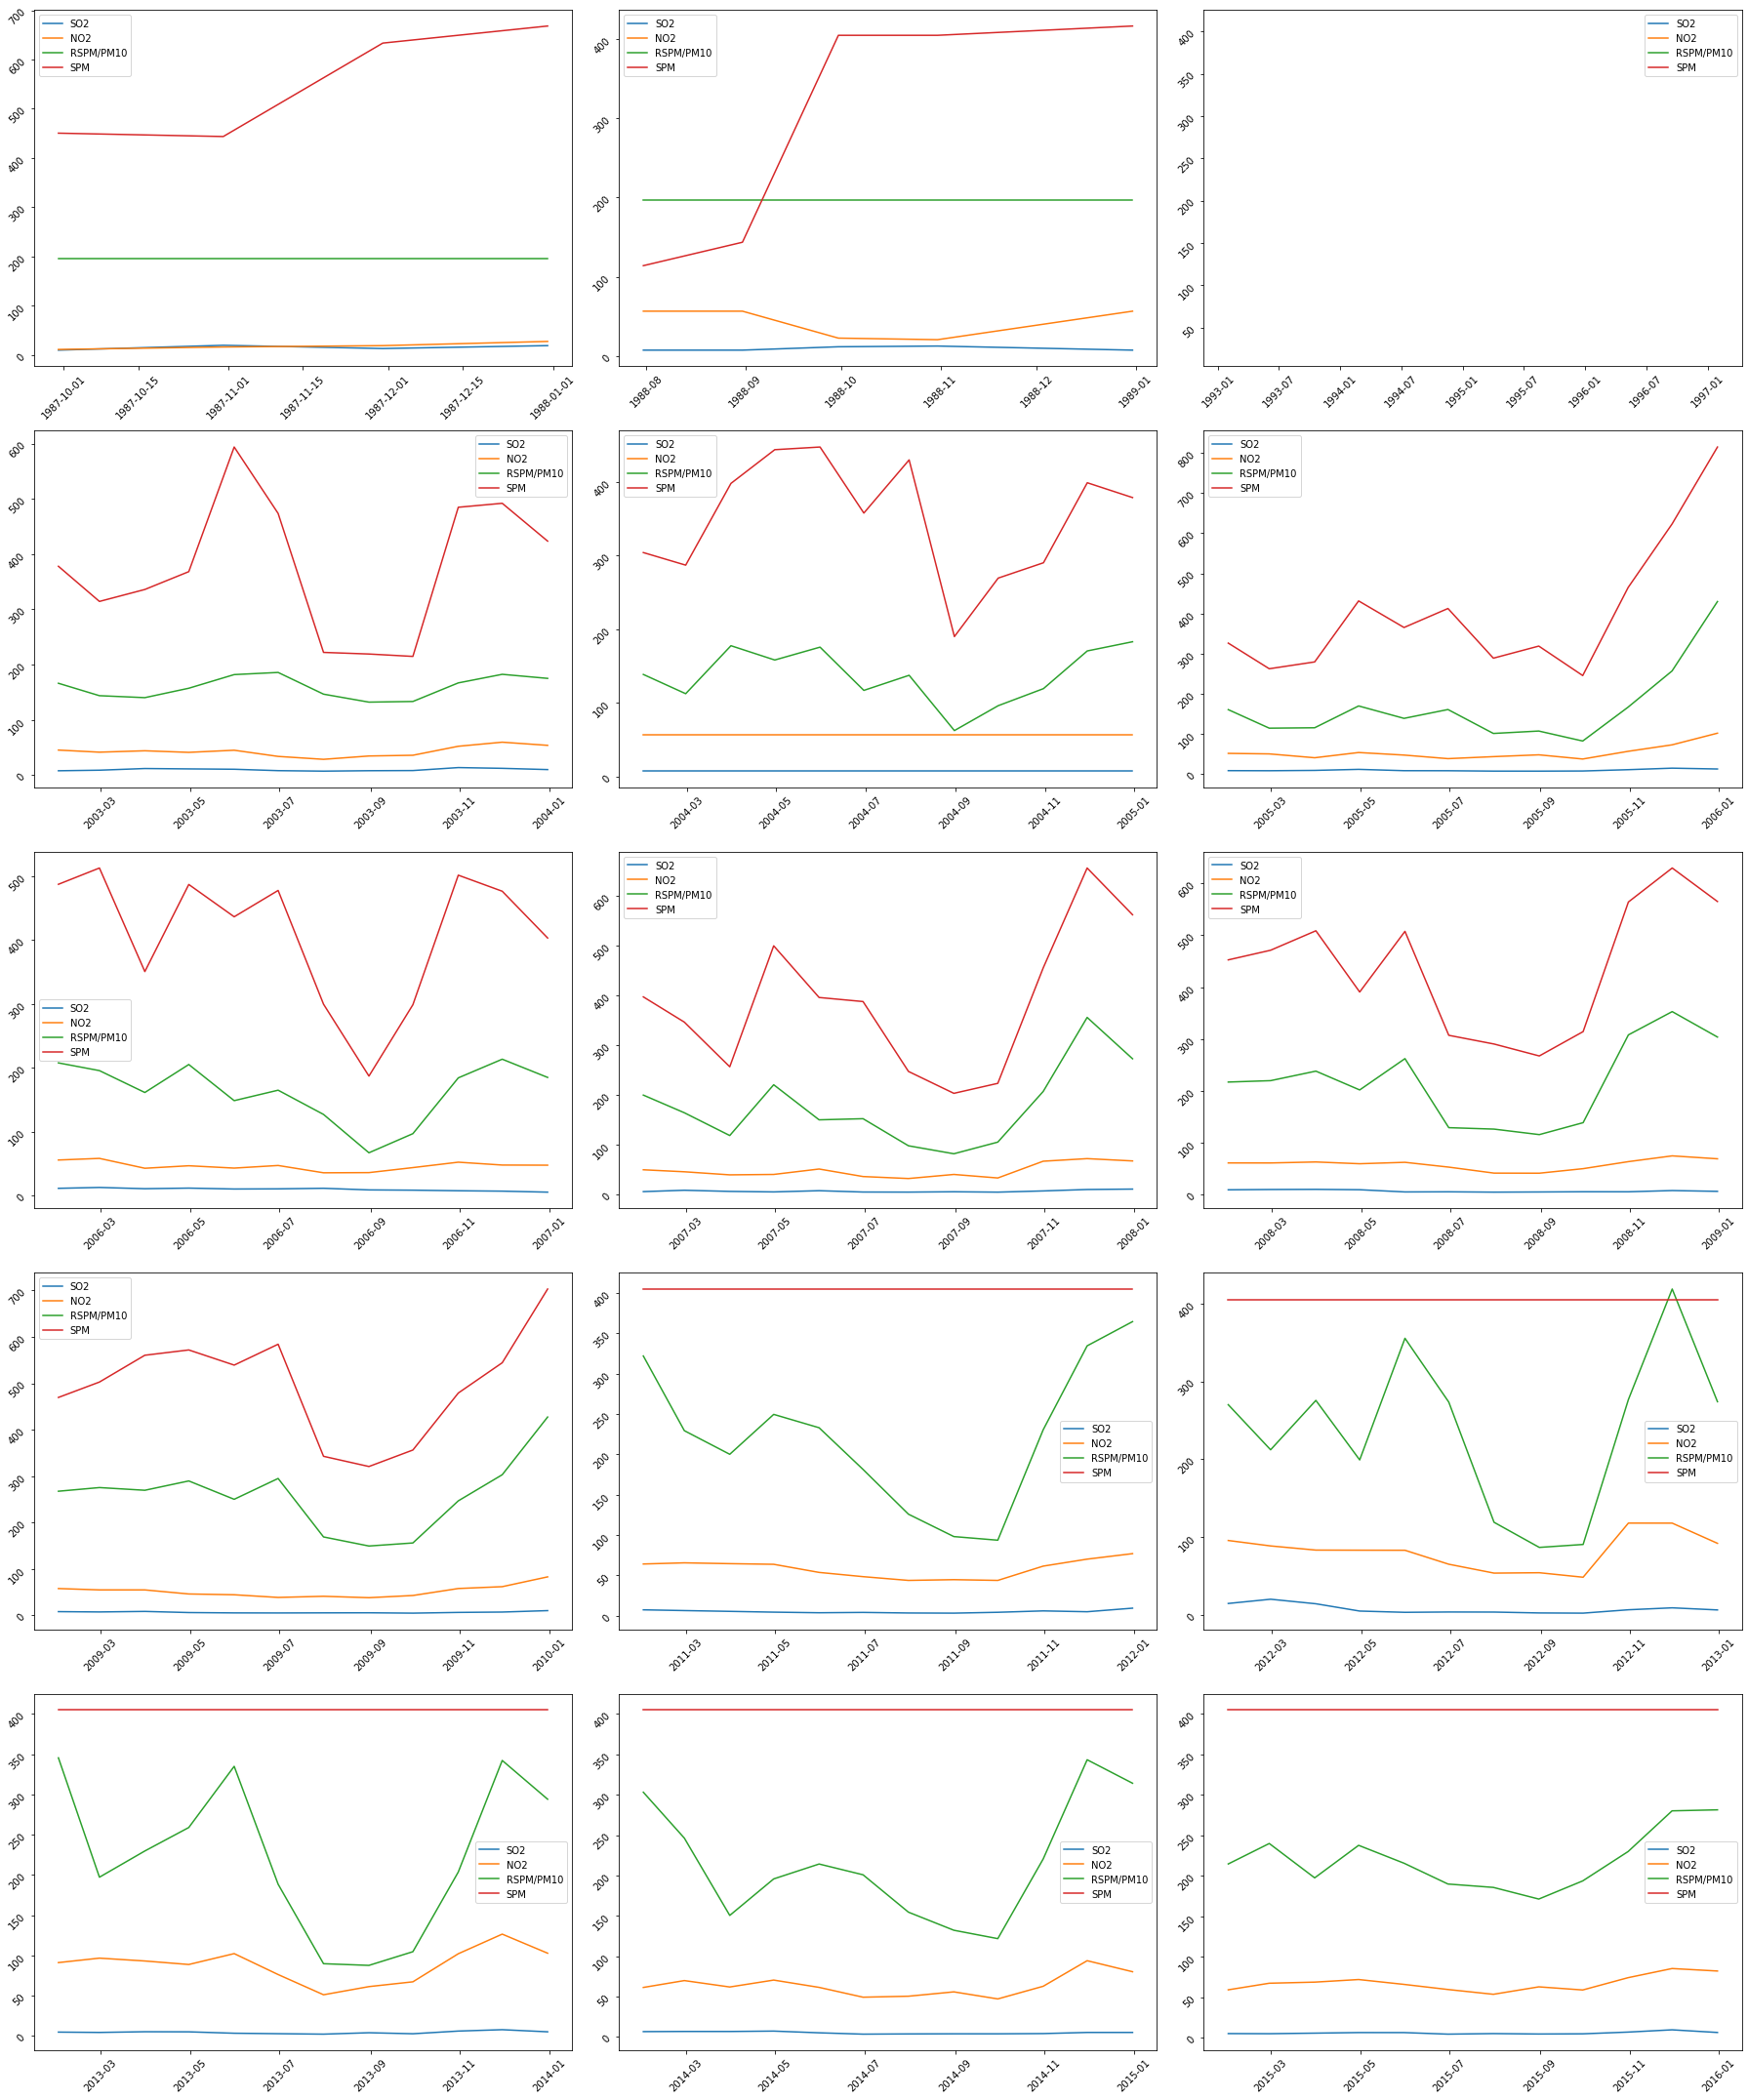

In [37]:
fig, axes = plt.subplots(5, 3, figsize = (25, 30))
num = 0
for i in range(5):
    for j in range(3):
        if num < len(year):
            axes[i, j].plot(year[num])
            axes[i, j].tick_params(labelrotation = 45)
            axes[i, j].legend(['SO2', 'NO2', 'RSPM/PM10', 'SPM']) 
        num += 1 
# plt.suptitle('Yearly variation in pollution(Delhi)')
plt.tight_layout()
plt.show()

## As per above generated Graphs, it does look like that over the years, RSPM/PM10 particle concentration in atmosphere does increase a lot around October-December.